In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid", color_codes=True)
import plotly.io as pio
import plotly.express as px
pd.set_option('display.max_columns', None)

import warnings

In [110]:
df=pd.read_csv('job.csv')
df.head()

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url
0,Senior Data Engineer,Data Engineer,Securenext Softwares Private Limited,"Chennai, Tamil Nadu","This includes developing ETL pipelines, settin...",PostedJust posted,2023-03-17,"₹10,00,000 - ₹15,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
1,Broadcast Engineer,Data Engineer,"Conference Technologies, Inc.","Pune, Maharashtra",Key participant in business development includ...,PostedPosted 30+ days ago,2023-03-17,NaN,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
2,Senior Data Scientist,Data Engineer,Kroll,"Hyderabad, Telangana",Direct and mentor data scientists and data ana...,PostedPosted 7 days ago,2023-03-17,NaN,https://in.indeed.com/jobs?q=Data+Engineer&l=I...
3,Sr. Python Developer,Data Engineer,Lotus Interworks Inc,"Mumbai, Maharashtra",Implementing security and data protection solu...,PostedPosted 30+ days ago,2023-03-17,"₹50,000 - ₹80,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
4,Senior Platform Engineer,Data Engineer,Giant Eagle,"Yelahanka Satellite Town, Karnataka",Our team of more than 150 members at the GCC e...,PostedPosted 15 days ago,2023-03-17,NaN,https://in.indeed.com/jobs?q=Data+Engineer&l=I...


In [111]:
df=df.dropna()
df

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url
0,Senior Data Engineer,Data Engineer,Securenext Softwares Private Limited,"Chennai, Tamil Nadu","This includes developing ETL pipelines, settin...",PostedJust posted,2023-03-17,"₹10,00,000 - ₹15,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
3,Sr. Python Developer,Data Engineer,Lotus Interworks Inc,"Mumbai, Maharashtra",Implementing security and data protection solu...,PostedPosted 30+ days ago,2023-03-17,"₹50,000 - ₹80,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
8,Data Analyst/Data Engineer,Data Engineer,The English Channel,"Remote in Ahmedabad, Gujarat",Develop and communicate data extraction approa...,EmployerActive 15 days ago,2023-03-17,"₹6,00,000 - ₹9,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
10,Data Engineer,Data Engineer,Global Employees,Remote,Passion for engineering and computer science a...,EmployerActive 3 days ago,2023-03-17,"₹10,00,000 - ₹30,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
11,SQL Data Engineer,Data Engineer,Smart fusion corporate solution,Remote,mmediate Hiring!!! Salary : 400000 lak to 1200...,EmployerActive 1 day ago,2023-03-17,"₹6,00,000 - ₹12,00,000",https://in.indeed.com/jobs?q=Data+Engineer&l=I...
...,...,...,...,...,...,...,...,...,...
1756,Data Scientist,Machine Learning Engineer,Marktine Technology Solutions,"Delhi, Delhi",Build predictive models and machine-learning a...,PostedPosted 30+ days ago,2023-03-17,"₹20,00,000",https://in.indeed.com/jobs?q=Machine+Learning+...
1770,Sr Software Engineer - AI & ML,Machine Learning Engineer,Mantra Technologies Private Limited,"Hyderabad, Telangana",Analyze and explain AI and machine learning (M...,EmployerActive 1 day ago,2023-03-17,"₹15,00,000 - ₹30,00,000",https://in.indeed.com/jobs?q=Machine+Learning+...
1773,Azure Data Engineer,Machine Learning Engineer,Acuvate,"Hyderabad, Telangana",Construction of data science and machine learn...,EmployerActive 1 day ago,2023-03-17,"Up to ₹14,00,000",https://in.indeed.com/jobs?q=Machine+Learning+...
1777,AI/ML (Computer Vision),Machine Learning Engineer,Magnifi,"Indore, Madhya Pradesh",Computer Vision Image processing Machine learn...,PostedPosted 7 days ago,2023-03-17,"₹5,00,000",https://in.indeed.com/jobs?q=Machine+Learning+...


In [112]:
df[['city','state','remo']]=df.Job_location.str.split(",", expand = True)
df=df.drop(['remo'],axis=1)

In [113]:
s=list(df['Job_salary'])
import re
pattern = r'[^\d.-]'
data_cleaned = [re.sub(pattern, '', i) for i in s]
df['Job_salary']=data_cleaned


In [114]:
num=[]
k=[]
for i in range(0,len(data_cleaned)):
  s=data_cleaned[i].split('-')
  if len(s)==2:
    for j in range(0,len(s)):
      num.append(int(''.join(map(str, s[j]))))
    sum=(num[0]+num[1])/2
    k.append(sum)
    num=[]
  else:
    k.append(int(data_cleaned[i]))
df['Job_salary']=k

In [115]:
df

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url,city,state
0,Senior Data Engineer,Data Engineer,Securenext Softwares Private Limited,"Chennai, Tamil Nadu","This includes developing ETL pipelines, settin...",PostedJust posted,2023-03-17,1250000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Chennai,Tamil Nadu
3,Sr. Python Developer,Data Engineer,Lotus Interworks Inc,"Mumbai, Maharashtra",Implementing security and data protection solu...,PostedPosted 30+ days ago,2023-03-17,65000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Mumbai,Maharashtra
8,Data Analyst/Data Engineer,Data Engineer,The English Channel,"Remote in Ahmedabad, Gujarat",Develop and communicate data extraction approa...,EmployerActive 15 days ago,2023-03-17,750000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote in Ahmedabad,Gujarat
10,Data Engineer,Data Engineer,Global Employees,Remote,Passion for engineering and computer science a...,EmployerActive 3 days ago,2023-03-17,2000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
11,SQL Data Engineer,Data Engineer,Smart fusion corporate solution,Remote,mmediate Hiring!!! Salary : 400000 lak to 1200...,EmployerActive 1 day ago,2023-03-17,900000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
...,...,...,...,...,...,...,...,...,...,...,...
1756,Data Scientist,Machine Learning Engineer,Marktine Technology Solutions,"Delhi, Delhi",Build predictive models and machine-learning a...,PostedPosted 30+ days ago,2023-03-17,2000000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Delhi,Delhi
1770,Sr Software Engineer - AI & ML,Machine Learning Engineer,Mantra Technologies Private Limited,"Hyderabad, Telangana",Analyze and explain AI and machine learning (M...,EmployerActive 1 day ago,2023-03-17,2250000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Hyderabad,Telangana
1773,Azure Data Engineer,Machine Learning Engineer,Acuvate,"Hyderabad, Telangana",Construction of data science and machine learn...,EmployerActive 1 day ago,2023-03-17,1400000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Hyderabad,Telangana
1777,AI/ML (Computer Vision),Machine Learning Engineer,Magnifi,"Indore, Madhya Pradesh",Computer Vision Image processing Machine learn...,PostedPosted 7 days ago,2023-03-17,500000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Indore,Madhya Pradesh


# EDA

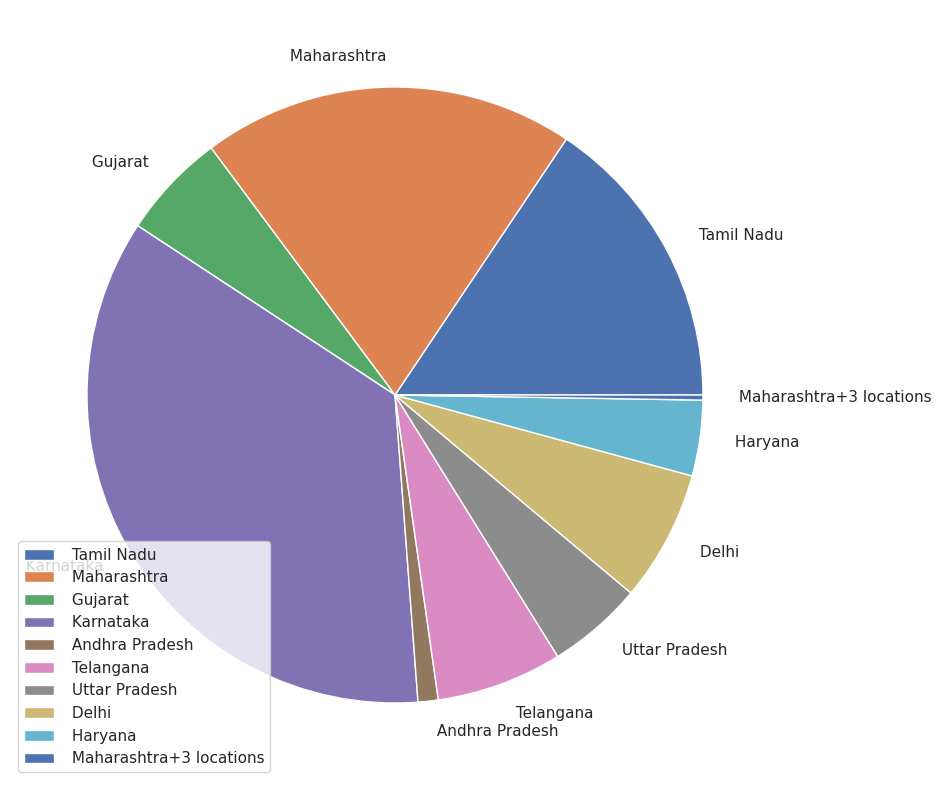

In [133]:
# How are the jobs distributed geographically?
# job distribution
k=[]
s=[]
location=list(df['state'].unique())
# Show which companies have vacancies in different role.
for i in range (0,len(location)-21):
    k.append(df[df['state']==location[i]].shape[0])
    s.append(location[i])
y =k
mylabels = s
plt.figure(figsize=(20,10))
plt.pie(y, labels = mylabels)
plt.legend()

In [135]:
#Show which companies have vacancies in different role.

<BarContainer object of 373 artists>

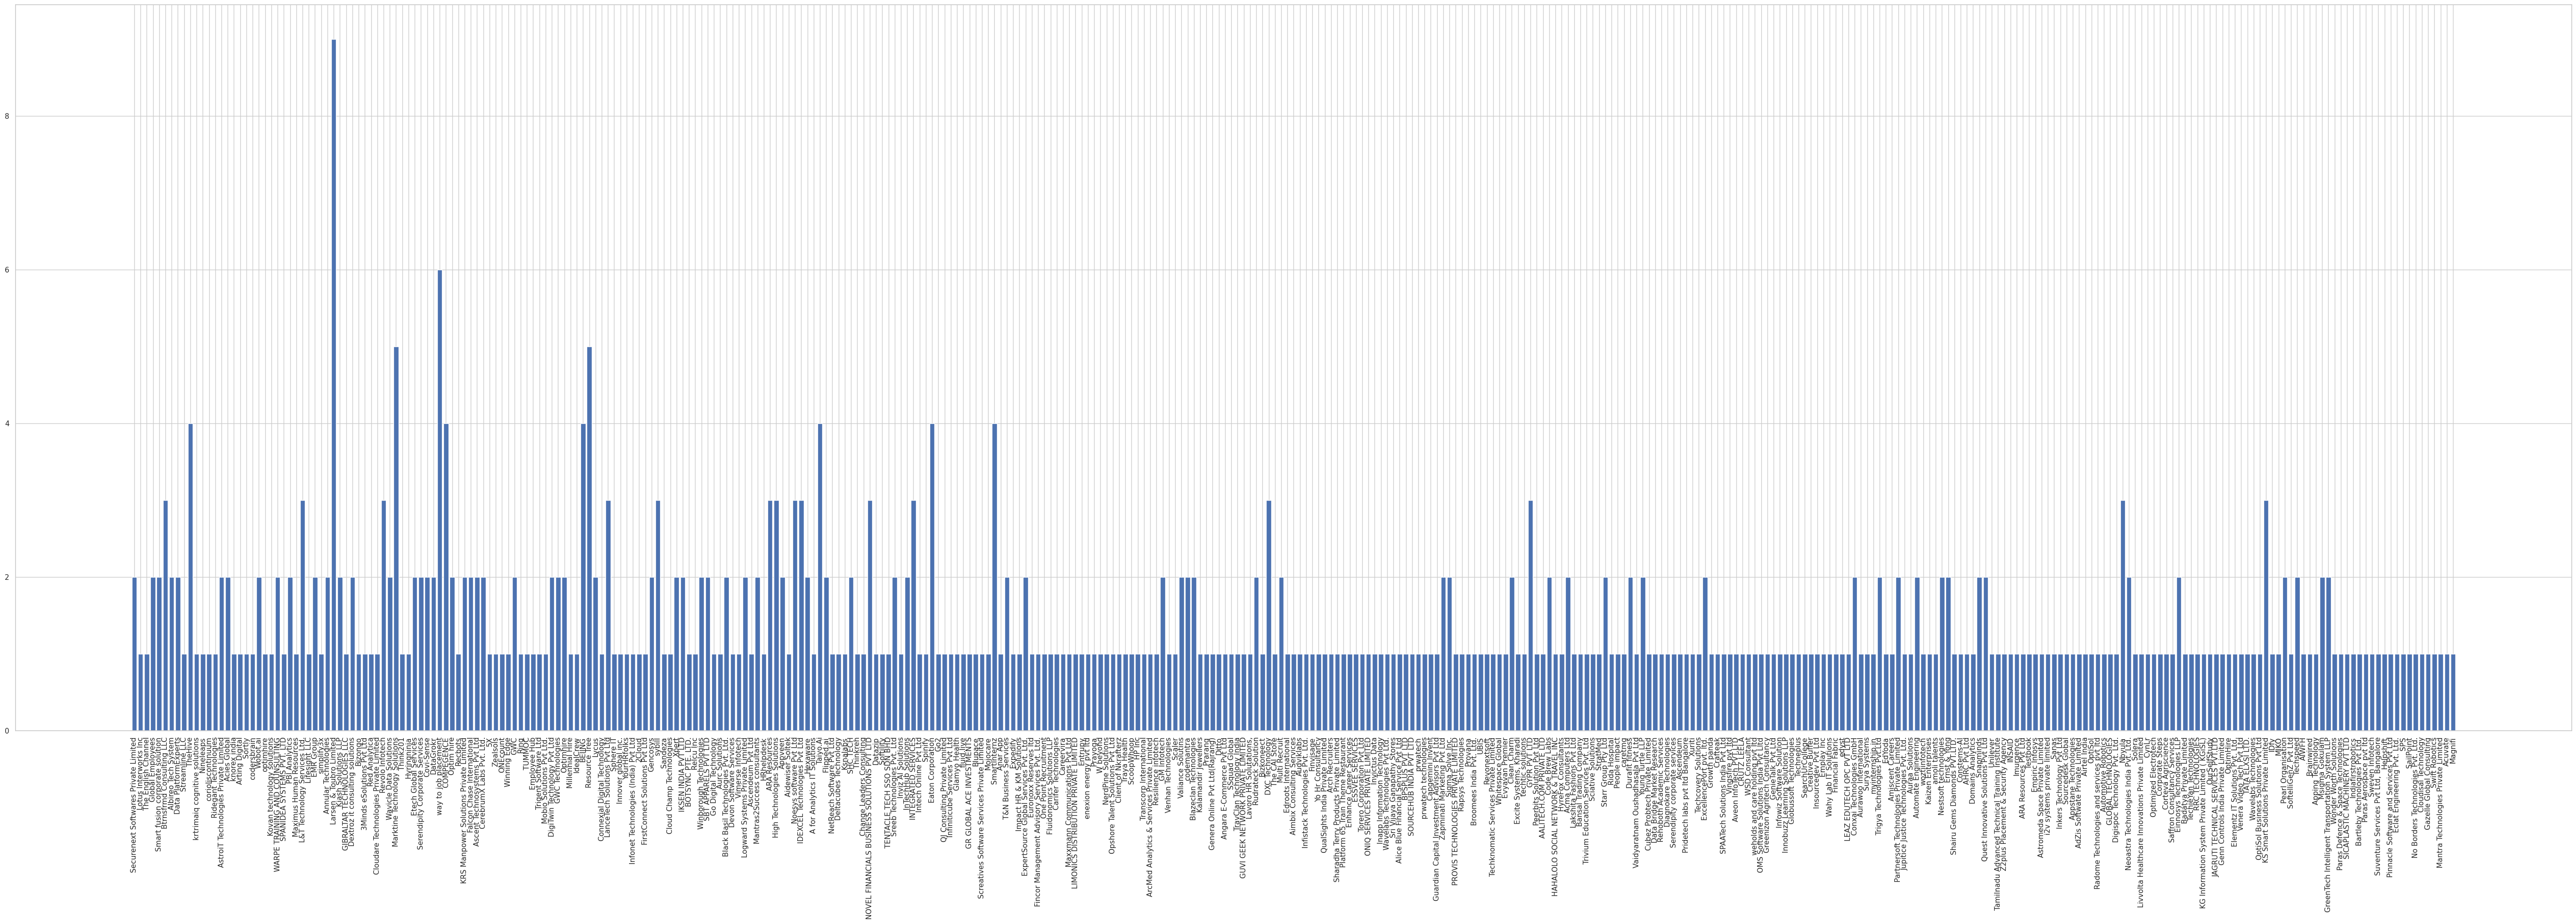

In [134]:
no=[]
company=list(df['Company'].unique())
# Show which companies have vacancies in different role.
for i in df['Company'].unique():
  no.append(df[df['Company']==i].shape[0])
plt.figure(figsize=(70,20))
plt.xticks(rotation='vertical')
plt.bar(range(len(company)),no, tick_label=company)

In [136]:
# • Show the distribution of number of characters in description.

In [137]:
des=list(df['Job_summary'])
desc=str(des)
all_freq = {}
 
for i in desc:
    if i in all_freq:
        all_freq[i] += 1
    else:
        all_freq[i] = 1
 
# printing result
char = dict(sorted(all_freq.items(), key=lambda x: x[0]))

<BarContainer object of 100 artists>

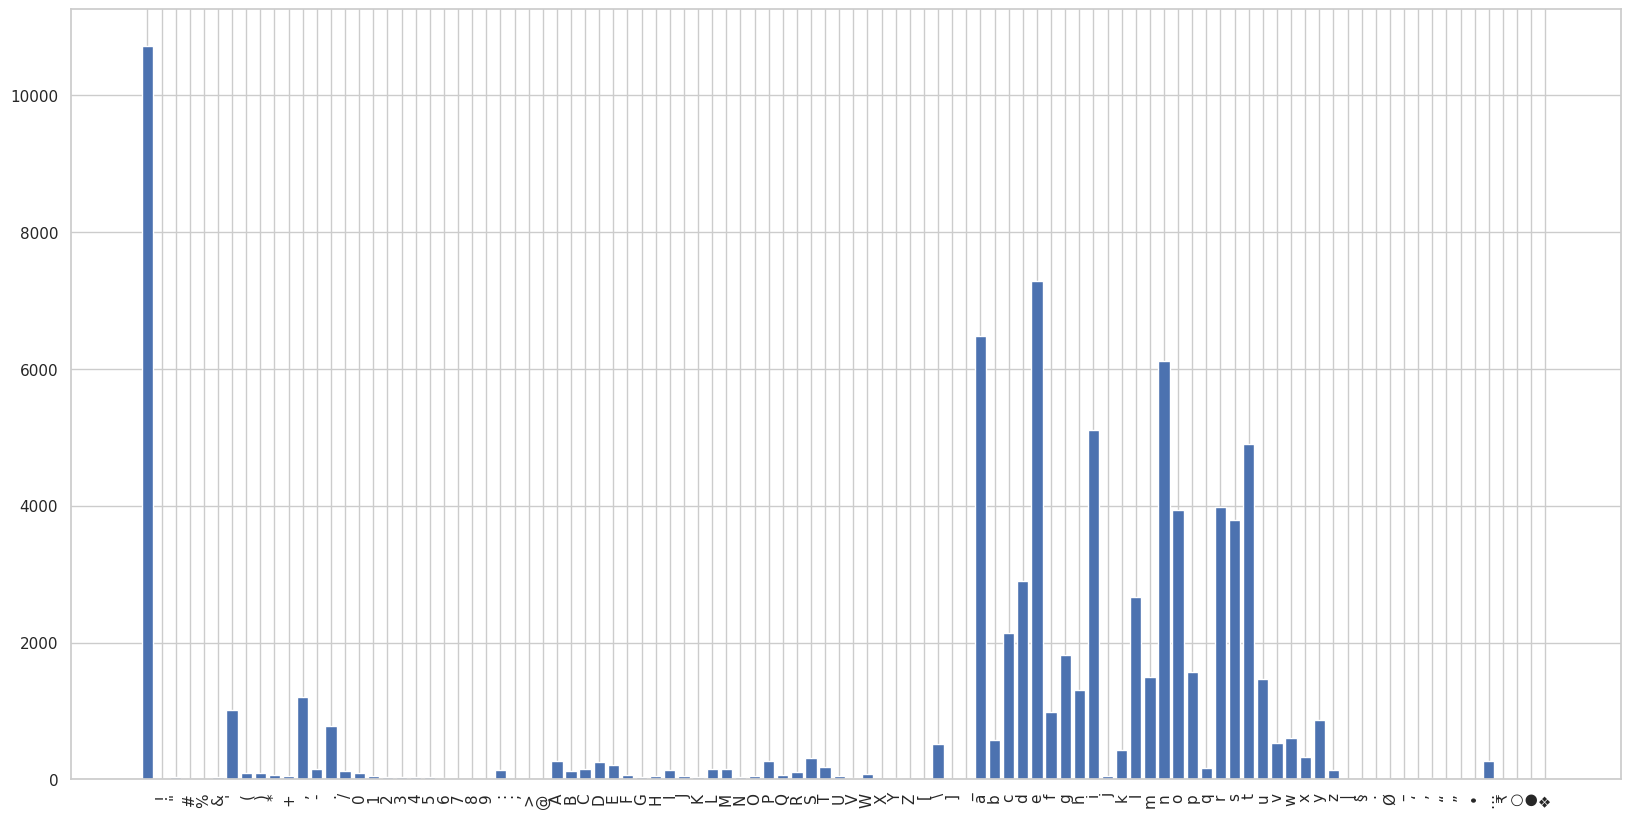

In [138]:
names = list(char.keys())
values = list(char.values())
plt.figure(figsize=(20,10))
plt.xticks(rotation='vertical')
plt.bar(range(len(char)), values, tick_label=names)

In [139]:
# • Show the distribution of salaries in remote jobs based on roles.

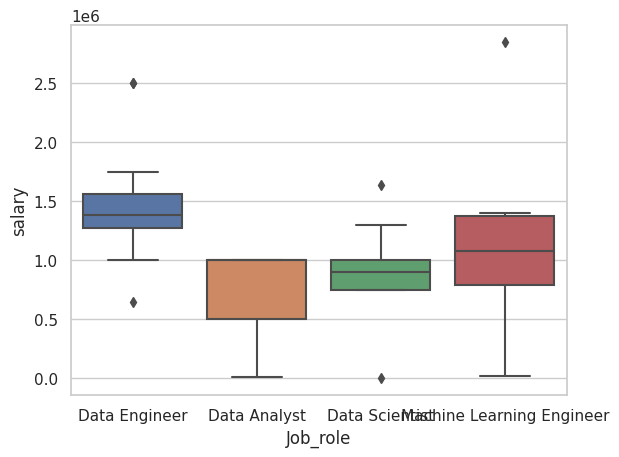

In [140]:
db=df[df['Job_location']=='Chennai, Tamil Nadu']
ax = sns.boxplot(x="Job_role", y="Job_salary", data=db)
ax.set_ylabel("salary")
plt.show()

In [141]:
# Show the distribution of salaries in ‘Bangalore’.

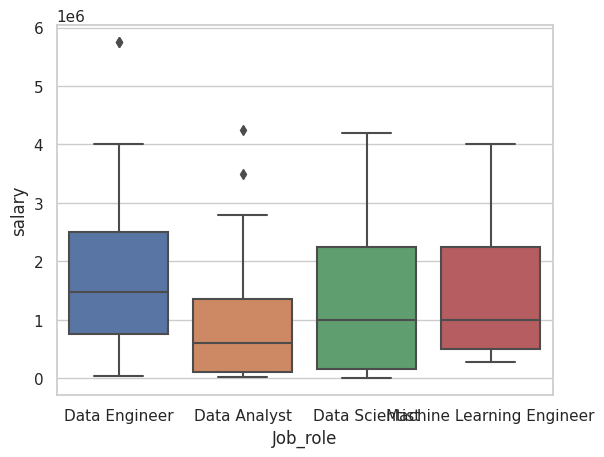

In [142]:
db=df[df['Job_location']=='Bengaluru, Karnataka']
ax = sns.boxplot(x="Job_role", y="Job_salary", data=db)
ax.set_ylabel("salary")
plt.show()

# Part C

In [143]:
# Find the top 5 locations/regions based on tumber of data-points for each of the job roles
df_analyst=df[df['Job_role']=='Data Analyst']
df_enginer=df[df['Job_role']=='Data Engineer']
df_science=df[df['Job_role']=='Data Science']
df_machine=df[df['Job_role']=='Machine Learning Engineer']
df

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url,city,state
0,Senior Data Engineer,Data Engineer,Securenext Softwares Private Limited,"Chennai, Tamil Nadu","This includes developing ETL pipelines, settin...",PostedJust posted,2023-03-17,1250000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Chennai,Tamil Nadu
3,Sr. Python Developer,Data Engineer,Lotus Interworks Inc,"Mumbai, Maharashtra",Implementing security and data protection solu...,PostedPosted 30+ days ago,2023-03-17,65000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Mumbai,Maharashtra
8,Data Analyst/Data Engineer,Data Engineer,The English Channel,"Remote in Ahmedabad, Gujarat",Develop and communicate data extraction approa...,EmployerActive 15 days ago,2023-03-17,750000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote in Ahmedabad,Gujarat
10,Data Engineer,Data Engineer,Global Employees,Remote,Passion for engineering and computer science a...,EmployerActive 3 days ago,2023-03-17,2000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
11,SQL Data Engineer,Data Engineer,Smart fusion corporate solution,Remote,mmediate Hiring!!! Salary : 400000 lak to 1200...,EmployerActive 1 day ago,2023-03-17,900000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
...,...,...,...,...,...,...,...,...,...,...,...
1756,Data Scientist,Machine Learning Engineer,Marktine Technology Solutions,"Delhi, Delhi",Build predictive models and machine-learning a...,PostedPosted 30+ days ago,2023-03-17,2000000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Delhi,Delhi
1770,Sr Software Engineer - AI & ML,Machine Learning Engineer,Mantra Technologies Private Limited,"Hyderabad, Telangana",Analyze and explain AI and machine learning (M...,EmployerActive 1 day ago,2023-03-17,2250000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Hyderabad,Telangana
1773,Azure Data Engineer,Machine Learning Engineer,Acuvate,"Hyderabad, Telangana",Construction of data science and machine learn...,EmployerActive 1 day ago,2023-03-17,1400000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Hyderabad,Telangana
1777,AI/ML (Computer Vision),Machine Learning Engineer,Magnifi,"Indore, Madhya Pradesh",Computer Vision Image processing Machine learn...,PostedPosted 7 days ago,2023-03-17,500000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Indore,Madhya Pradesh


In [144]:
# checking the top 5 cities for data analysts
px.histogram(df_analyst['city'])
# top 5 cities are 1.Bengaluru ,2.Remote ,3.Mumbai ,4.pune ,5.Delhi

In [145]:
db = df[df['city'].isin(['Bengaluru', 'Remote', 'Mumbai', 'Pune', 'Delhi'])]

In [146]:
db

,Job_title,Job_role,Company,Job_location,Job_summary,Post_date,Today,Job_salary,Job_url,city,state
3,Sr. Python Developer,Data Engineer,Lotus Interworks Inc,"Mumbai, Maharashtra",Implementing security and data protection solu...,PostedPosted 30+ days ago,2023-03-17,65000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Mumbai,Maharashtra
10,Data Engineer,Data Engineer,Global Employees,Remote,Passion for engineering and computer science a...,EmployerActive 3 days ago,2023-03-17,2000000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
11,SQL Data Engineer,Data Engineer,Smart fusion corporate solution,Remote,mmediate Hiring!!! Salary : 400000 lak to 1200...,EmployerActive 1 day ago,2023-03-17,900000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
13,Big Data Engineer,Data Engineer,Albireo Tech System,Remote,"Skills- ETL, aws, sql, kafka, spark, dynamodb....",PostedPosted 24 days ago,2023-03-17,650.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
14,Manual Test Engineer,Data Engineer,Data PlatformExperts,Remote,Understand the assigned client requirement spe...,EmployerActive 8 days ago,2023-03-17,500000.0,https://in.indeed.com/jobs?q=Data+Engineer&l=I...,Remote,None
...,...,...,...,...,...,...,...,...,...,...,...
1695,Software Engineer - II (ML Team),Machine Learning Engineer,Helpshift,"Pune, Maharashtra",Research & apply machine learning in various p...,PostedPosted 30+ days ago,2023-03-17,30000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Pune,Maharashtra
1729,Software engineer - Analytics,Machine Learning Engineer,SPS,"Bengaluru, Karnataka",The system may or may not involve machine lear...,EmployerActive 3 days ago,2023-03-17,1000000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Bengaluru,Karnataka
1747,AWS Data Engineer with ML ops,Machine Learning Engineer,Gazelle Global Consulting,Remote,Incident and problem management specific to AW...,PostedPosted 30+ days ago,2023-03-17,65547.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Remote,None
1749,Robotics Software Engineer,Machine Learning Engineer,Swift Robotics,"Mumbai, Maharashtra","Knowledge and interest in computer vision, mac...",EmployerActive 2 days ago,2023-03-17,550000.0,https://in.indeed.com/jobs?q=Machine+Learning+...,Mumbai,Maharashtra


In [147]:
px.bar(x=db['city'],y=db['Job_salary'])

In [148]:
mean